### 单个化合物

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED

# 定义或读取一个分子
smiles = 'CCO'  # 举例，乙醇的 SMILES 表示
mol = Chem.MolFromSmiles(smiles)

# 计算分子量
mw = Descriptors.MolWt(mol)
print(f"Molecular Weight (MW): {mw} g/mol")

# 计算拓扑极性表面积
tpsa = Descriptors.TPSA(mol)
print(f"Topological Polar Surface Area (TPSA): {tpsa} Å²")

# 计算氢键受体数量
hba = Descriptors.NumHAcceptors(mol)
print(f"Hydrogen Bond Acceptors (HBA): {hba}")

# 计算氢键供体数量
hbd = Descriptors.NumHDonors(mol)
print(f"Hydrogen Bond Donors (HBD): {hbd}")

# 计算LogP
logp = Descriptors.MolLogP(mol)
print(f"LogP: {logp}")

# 计算QED分数
qed_score = QED.qed(mol)
print(f"QED Score: {qed_score}")


Molecular Weight (MW): 46.069 g/mol
Topological Polar Surface Area (TPSA): 20.23 Å²
Hydrogen Bond Acceptors (HBA): 1
Hydrogen Bond Donors (HBD): 1
LogP: -0.0014000000000000123
QED Score: 0.40680796565539457


### 批量读取scv文件

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, QED

# 读取数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')

# 计算描述符的函数
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {
        "MW": Descriptors.MolWt(mol),
        "TPSA": Descriptors.TPSA(mol),
        "HBA": Descriptors.NumHAcceptors(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "LogP": Descriptors.MolLogP(mol),
        "QED": QED.qed(mol)
    }

# 应用函数计算物理性质
properties = data['canonical_smiles'].apply(calculate_descriptors)
properties_df = pd.DataFrame(properties.tolist())

# 合并数据帧
result_df = pd.concat([data, properties_df], axis=1)

# 保存到CSV
result_df.to_csv('./物理属性/MGAM_物理属性.csv', index=False)


### 数据可视化

In [12]:
from matplotlib import font_manager, pyplot as plt

# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称，并确保字体能支持加粗
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f and 'Bold' in f]

if t_nr_path:
    # 如果找到了Times New Roman Bold字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['font.weight'] = 'bold'  # 设置字体为加粗
else:
    # 如果没有找到加粗的Times New Roman，尝试设置为普通的Times New Roman并加粗
    t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]
    if t_nr_path:
        prop = font_manager.FontProperties(fname=t_nr_path[0])
        plt.rcParams['font.family'] = prop.get_name()
        plt.rcParams['font.weight'] = 'bold'
    else:
        # 如果没有找到Times New Roman，使用默认的衬线字体并设置为加粗
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.weight'] = 'bold'

In [13]:
from matplotlib import font_manager
# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]

if t_nr_path:
    # 如果找到了Times New Roman字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
else:
    # 如果没有找到，使用另一种可用的衬线字体
    plt.rcParams['font.family'] = 'serif'

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


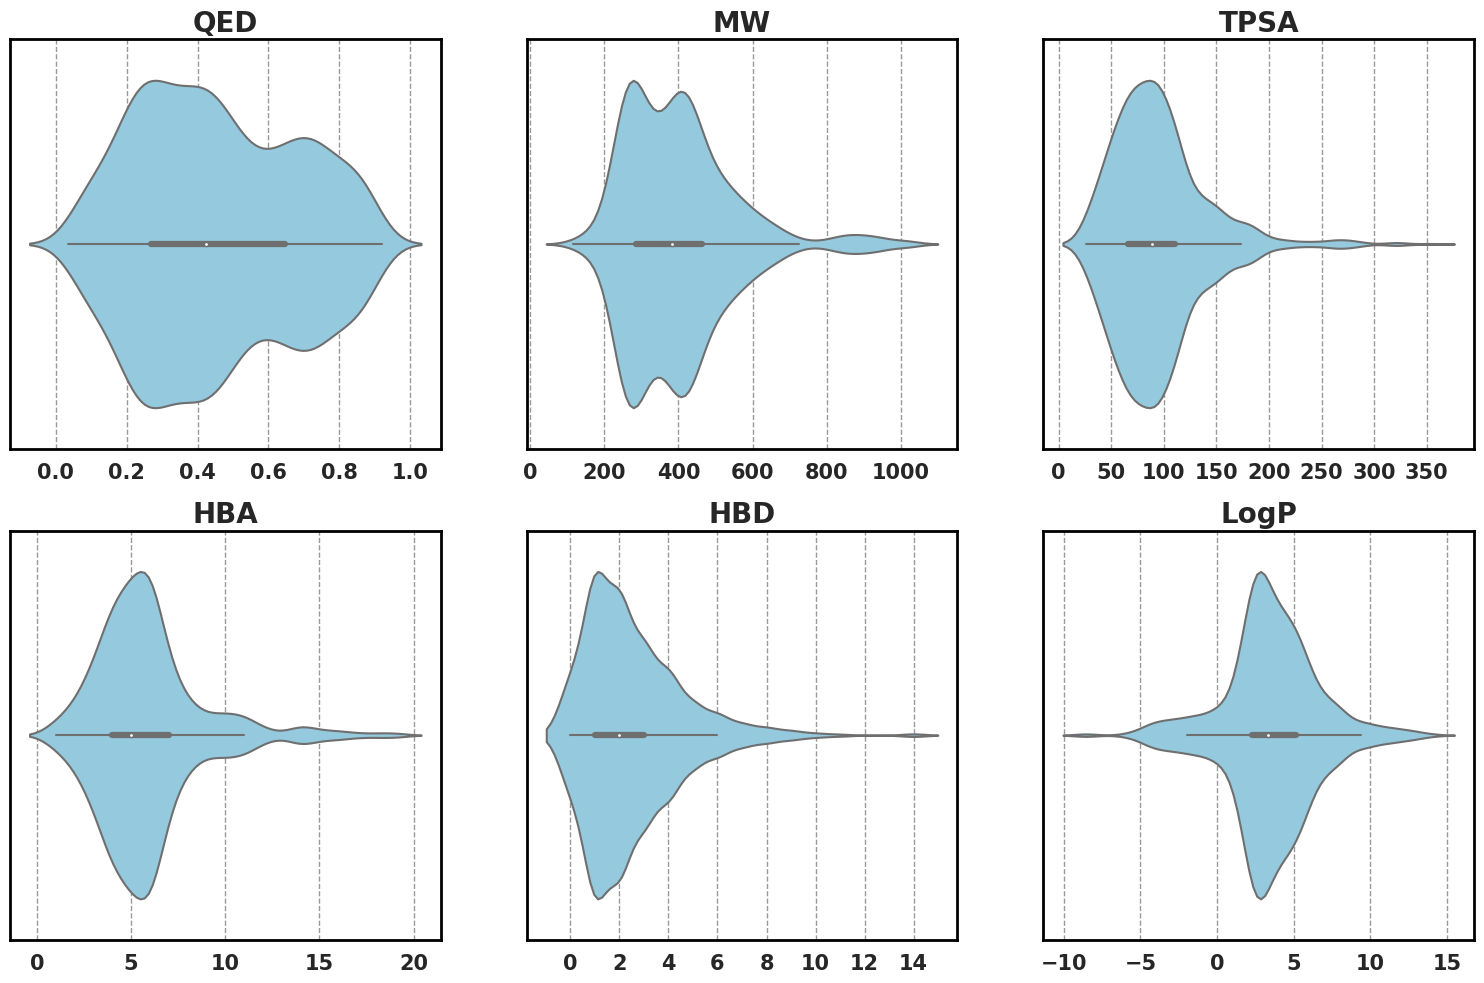

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')

# 设置绘图样式
sns.set(style="whitegrid")
plt.rc('axes', edgecolor='black', linewidth=2)  # 设置边框颜色和宽度
plt.rc('grid', linestyle="--", color='#999999')  # 设置网格线为黑色虚线

# 创建一个画布，设置大小
plt.figure(figsize=(15, 10))

# 定义子图的布局
features = ["QED", "MW", "TPSA", "HBA", "HBD", "LogP"]
n = len(features)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols  # 确保有足够的行

for index, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.violinplot(x=data[feature], color="skyblue")
    plt.title(feature, fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置标题的字体大小为20，字体加粗
    plt.xlabel('')  # 将X轴的标题设置为空字符串
    plt.xticks(fontsize=15, fontname='Times New Roman')  # 设置 X 轴坐标字体

# 调整子图间距
plt.tight_layout()

# 设置图表样式
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # 调整子图间的间距
plt.rcParams['axes.linewidth'] = 1  # 设置边框宽度
# sns.set_style("whitegrid", {'axes.edgecolor': 'black',  # 设置边框为黑色
#                             'grid.linestyle': '--',    # 设置网格线为虚线
#                             'grid.color': 'black',     # 设置网格线颜色为黑色
#                             'axes.linewidth': 1})      # 设置边框粗细为1

plt.savefig("./物理属性/MGAM物理属性.svg", bbox_inches="tight", dpi=600) # 保存图形
# 显示图形
plt.show()

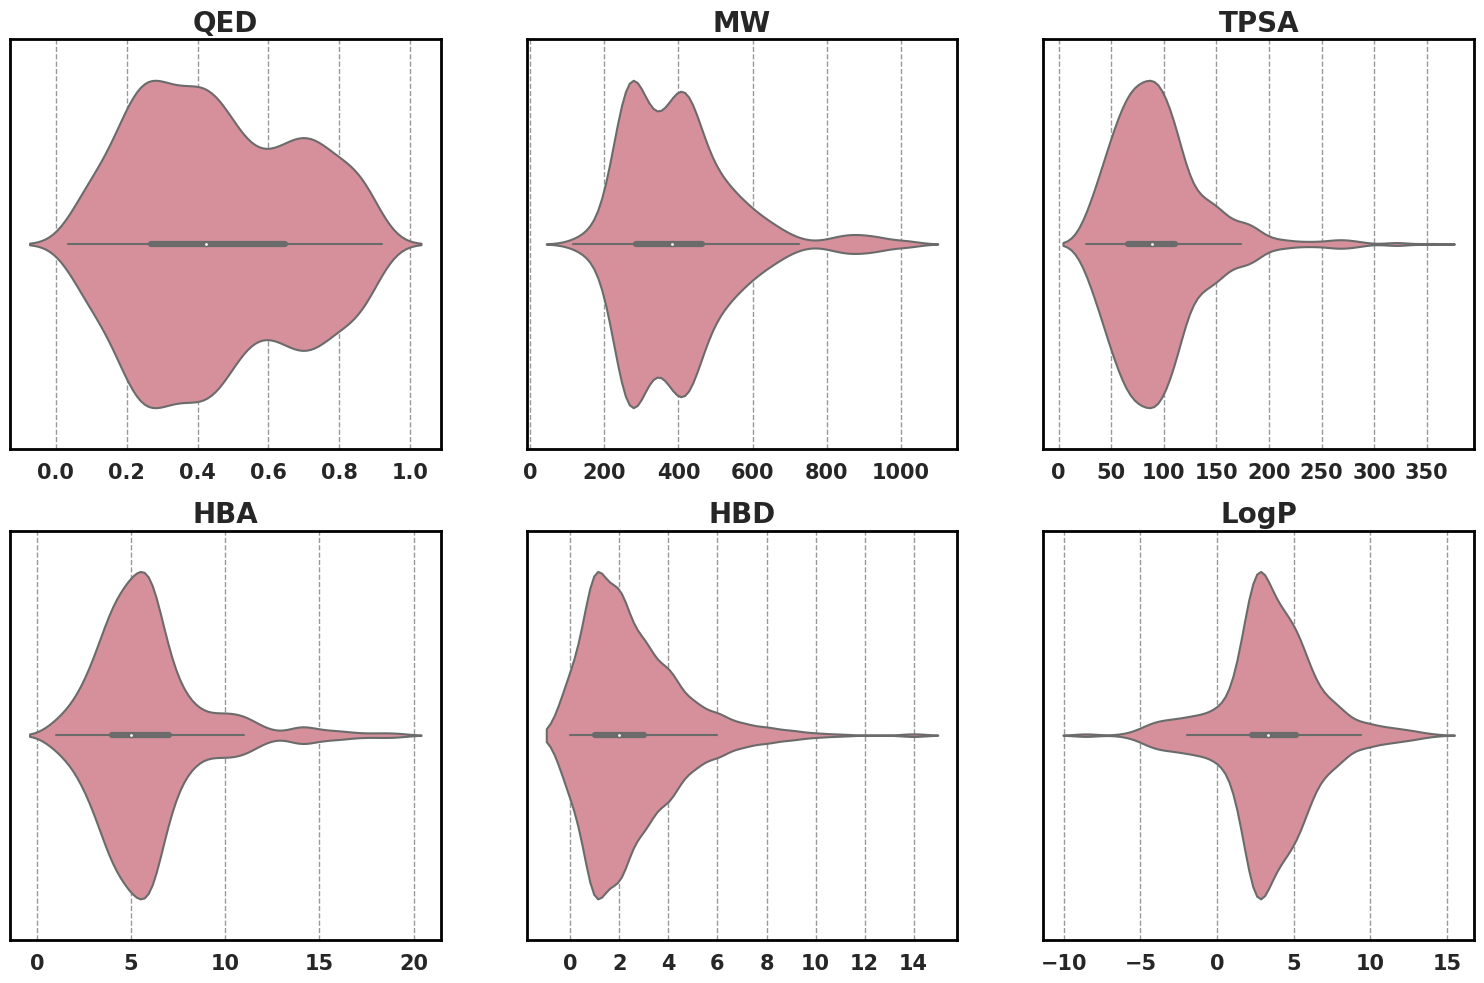

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')

# 设置绘图样式
sns.set(style="whitegrid")
plt.rc('axes', edgecolor='black', linewidth=2)  # 设置边框颜色和宽度
plt.rc('grid', linestyle="--", color='#999999')  # 设置网格线为黑色虚线

# 创建一个画布，设置大小
plt.figure(figsize=(15, 10))

# 定义子图的布局
features = ["QED", "MW", "TPSA", "HBA", "HBD", "LogP"]
n = len(features)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols  # 确保有足够的行

for index, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.violinplot(x=data[feature], color="#e08594")
    plt.title(feature, fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置标题的字体大小为20，字体加粗
    plt.xlabel('')  # 将X轴的标题设置为空字符串
    plt.xticks(fontsize=15, fontname='Times New Roman')  # 设置 X 轴坐标字体

# 调整子图间距
plt.tight_layout()

# 设置图表样式
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # 调整子图间的间距
plt.rcParams['axes.linewidth'] = 1  # 设置边框宽度
# sns.set_style("whitegrid", {'axes.edgecolor': 'black',  # 设置边框为黑色
#                             'grid.linestyle': '--',    # 设置网格线为虚线
#                             'grid.color': 'black',     # 设置网格线颜色为黑色
#                             'axes.linewidth': 1})      # 设置边框粗细为1

plt.savefig("./物理属性/MGAM物理属性.svg", bbox_inches="tight", dpi=600) # 保存图形
# 显示图形
plt.show()

* QED 分数在0.4以上可能表示较好的药物类候选性，而接近1的分数则表示非常理想的药物属性。
* 理想的分子量应小于或等于500 Dalton。
* TPSA 小于140Å²的化合物具有较好的口服生物可用性。
* 理想的氢键受体数应小于或等于10。
* 理想的氢键供体数应小于或等于5。
* 理想的LogP应小于或等于5。

### 碳骨架云图

IndexError: index 5 is out of bounds for axis 1 with size 5

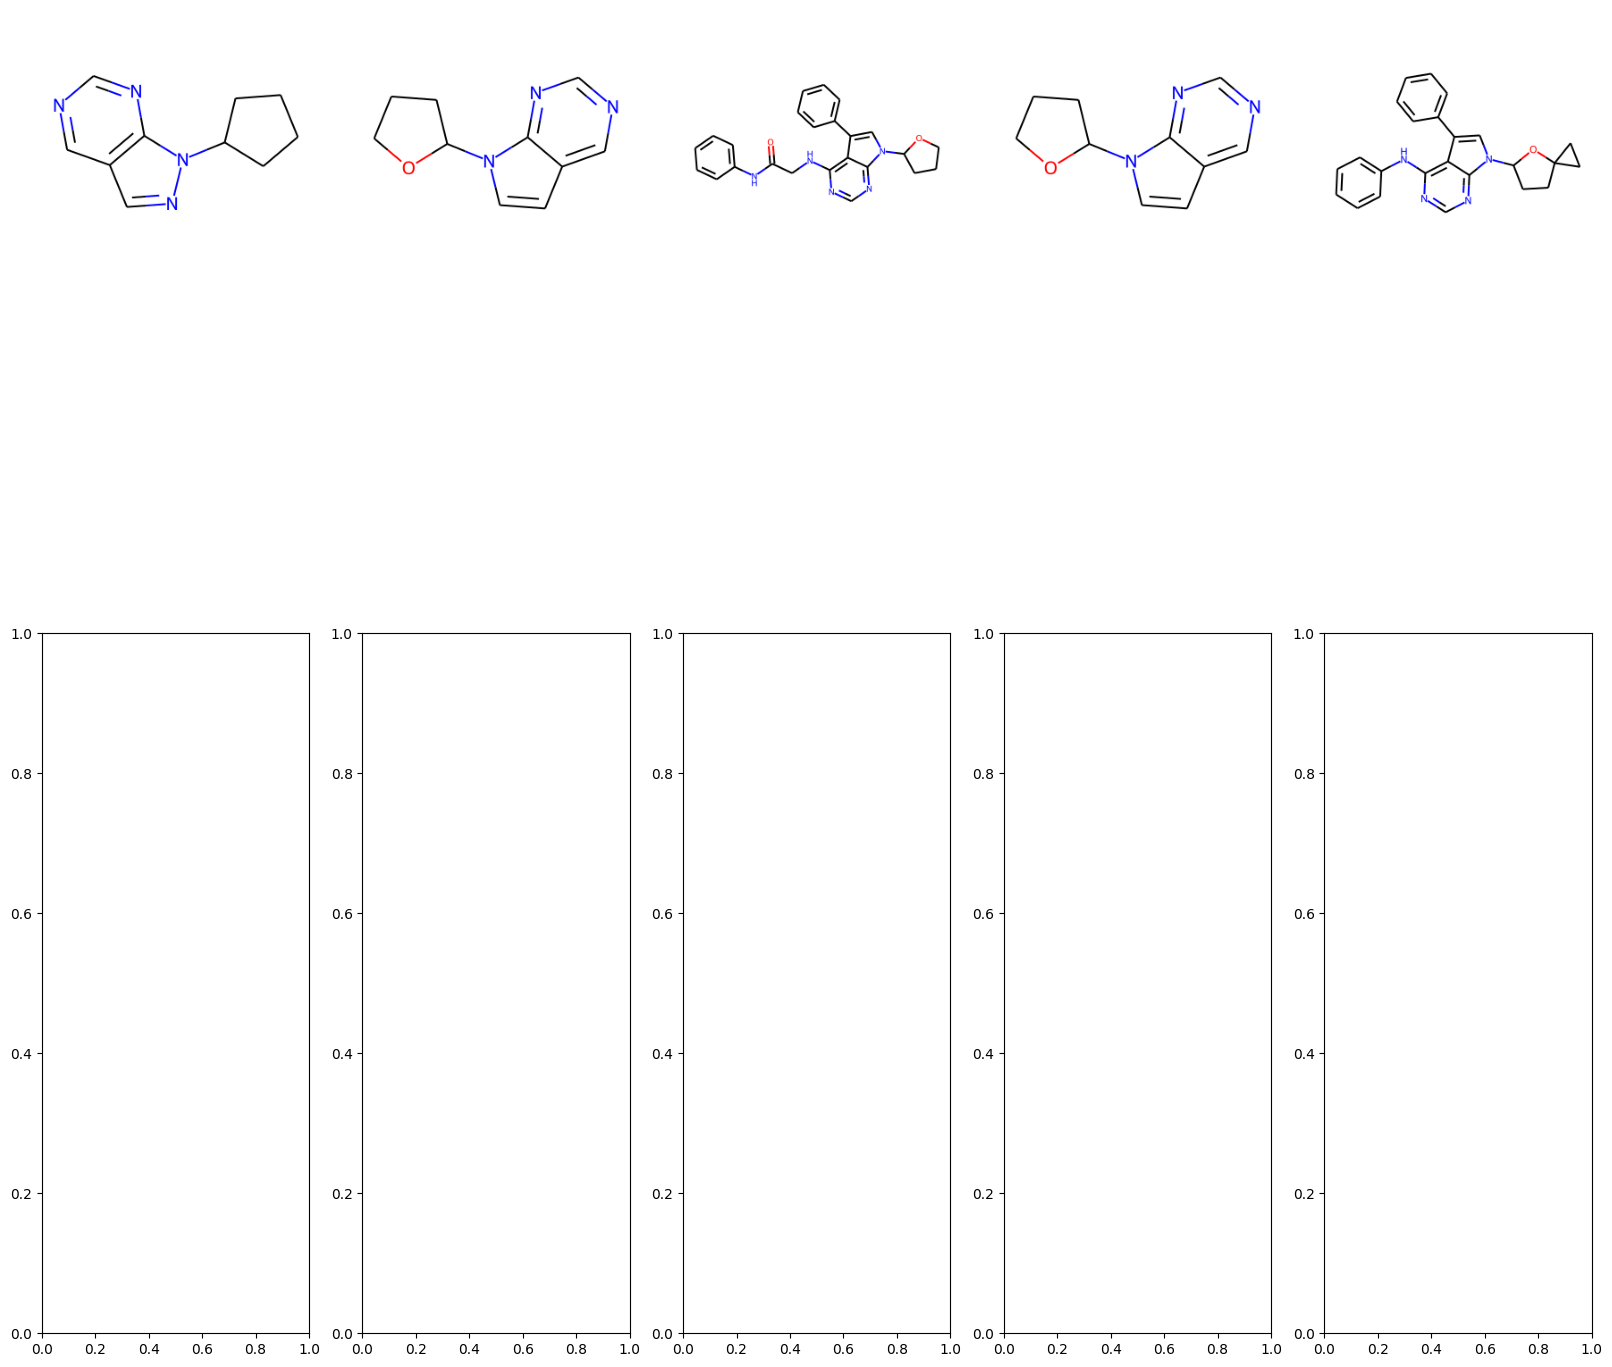

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Draw import SimilarityMaps

# 加载数据
data = pd.read_csv('./ADK-chembl-568.csv')

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 提取碳骨架
scaffolds = []
for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffolds.append(scaffold)

# 绘制碳骨架云图
fig, axes = plt.subplots(2, 5, figsize=(20, 20))

for i, scaffold in enumerate(scaffolds[:20]):  # 这里只绘制前100个碳骨架，避免图太密集
    row, col = divmod(i, 10)
    img = Draw.MolToImage(scaffold)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

### 碳骨架云图

In [ ]:
# # -*- coding: utf-8 -*-

# # Created on Wed Nov 20 15:08:41 2019
# #
# # @Author: Zhi-Jiang Yang, Dong-Sheng Cao
# # @Institution: CBDD Group, Xiangya School of Pharmaceutical Science, CSU, China
# # @Homepage: http://www.scbdd.com
# # @Mail: yzjkid9@gmail.com; oriental-cds@163.com
# # @Blog: https://blog.moyule.me


# import os
# import shutil
# from subprocess import run
# from scopy import ScoConfig
# import pandas as pd

# def ShowMcloud(file, number=150, skip=0, savedir=None, hidden=False):
#     """Visualization of large molecular data sets using the Molecule Cloud approach.

#     Reference:
#         (1) `P. Ertl, B. Rohde (2012)`_.

#     :param file: the absolute path of file whose first column is the SMILES, and second one is frequnency correspondly. Delimit is '\t'
#     :type file: str
#     :param number: process only first n molecules from the data file, defaults to 150
#     :type number: int, optional
#     :param skip: skip first n structures (usually used 1 to skip large phenyl), defaults to 0
#     :type skip: int, optional
#     :param savedir: the path to save figure, defaults to None
#     :type savedir: str, optional
#     :param hidden: whether hidden the figure after finished, defaults to False
#     :type hidden: bool, optional
#     :return: None

#     .. _P. Ertl, B. Rohde (2012):
#         https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-4-12
        
        
        
        
        
        
        
        
        
        
        
        

#     """
#     i = '-i' if savedir else ''
#     nogui = '-nogui' if hidden else ''

#     path = 'D:\code/mocu_data'
#     print(path)

#     command = 'cd /d {}\mcloud && \
#     java -cp ".;depictjni.jar;depict.jar" ertl/mcloud/MCloud\
#     -f {} -n {} -skip {} {} {}'.format(path, file, number, skip, i, nogui)

#     run(command, shell=True)

#     if savedir is not None:
#         try:
#             shutil.move(os.path.join(ScoConfig.MCDir, 'mcloud\mcloud.png'), savedir)
#         except:
#             pass
#     else:
#         pass


# if '__main__' == __name__:

#     ShowMcloud("scaffolds.smi", savedir=r"mcloud.png")

### Murcko scaffold

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载数据
file_path = './ADK-chembl-568.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 提取Murcko scaffold并统计数量
scaffold_set = set()

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    scaffold_set.add(scaffold_smiles)

# 计算不同Murcko scaffold的数量
scaffold_count = len(scaffold_set)

print("Number of unique Murcko scaffolds:", scaffold_count)


Number of unique Murcko scaffolds: 246


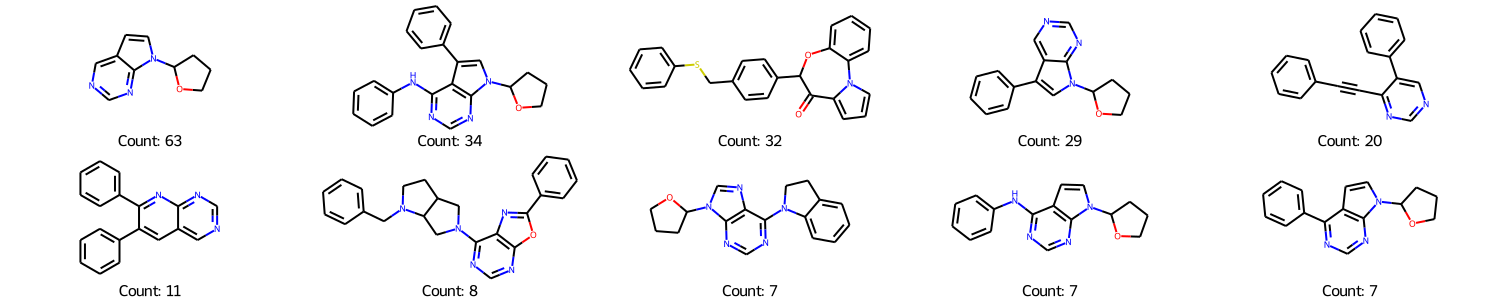

In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt

# 加载数据
file_path = './ADK-chembl-568.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 提取Murcko scaffold并统计数量
scaffold_dict = {}

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    if scaffold_smiles in scaffold_dict:
        scaffold_dict[scaffold_smiles] += 1
    else:
        scaffold_dict[scaffold_smiles] = 1

# 对scaffold按照出现频率排序
sorted_scaffolds = sorted(scaffold_dict.items(), key=lambda item: item[1], reverse=True)

# 提取前10个最常见的scaffold
top_10_scaffolds = sorted_scaffolds[:10]

# 绘制前10个scaffold
scaffold_mols = [Chem.MolFromSmiles(s[0]) for s in top_10_scaffolds]
scaffold_labels = [f"Count: {s[1]}" for s in top_10_scaffolds]

# 生成图片
img = Draw.MolsToGridImage(scaffold_mols, molsPerRow=5, subImgSize=(300, 150), legends=scaffold_labels)

img

In [34]:
# # 显示图片
# plt.figure(figsize=(20, 10))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # 保存图片
# img.save('./Murcko_scaffold/top_10_murcko_scaffolds.png')

# print("Top 10 Murcko scaffolds have been saved to 'top_10_murcko_scaffolds.png'")


In [21]:
# import pandas as pd
# from rdkit import Chem
# from rdkit.Chem import Draw
# from rdkit.Chem.Scaffolds import MurckoScaffold
# from PIL import Image

# # 加载数据
# file_path = './Murcko_scaffold/MGAM-dataset02.csv'  # 替换为你的文件路径
# data = pd.read_csv(file_path)

# # 提取SMILES列
# smiles_list = data['canonical_smiles']

# # 提取Murcko scaffold并统计数量
# scaffold_dict = {}
# for smi in smiles_list:
#     mol = Chem.MolFromSmiles(smi)
#     scaffold = MurckoScaffold.GetScaffoldForMol(mol)
#     scaffold_smiles = Chem.MolToSmiles(scaffold)
#     scaffold_dict[scaffold_smiles] = scaffold_dict.get(scaffold_smiles, 0) + 1

# # 对scaffold按照出现频率排序并提取前10个最常见的scaffold
# sorted_scaffolds = sorted(scaffold_dict.items(), key=lambda item: item[1], reverse=True)
# top_10_scaffolds = sorted_scaffolds[:10]

# # 绘制前10个scaffold
# scaffold_mols = [Chem.MolFromSmiles(s[0]) for s in top_10_scaffolds]

# # 创建一个新的大图像来保存网格
# width, height = 300, 300
# grid_img = Image.new('RGB', (width * 5, height * 2), 'white')

# # 绘制并排列图像到网格中
# for i, mol in enumerate(scaffold_mols):
#     img = Draw.MolToImage(mol, size=(width, height))
#     grid_img.paste(img, ((i % 5) * width, (i // 5) * height))

# # 保存网格图片
# grid_img.save('./Murcko_scaffold/top_10_murcko_scaffolds.png')
# grid_img.show()

# print("Top 10 Murcko scaffolds have been saved to 'top_10_murcko_scaffolds.png'")


Top 10 Murcko scaffolds have been saved to 'top_10_murcko_scaffolds.png'



(eog:103325): EOG-CRITICAL **: 02:04:05.351: eog_pixbuf_get_format_by_suffix: assertion 'suffix != NULL' failed


### 碳骨架

In [163]:
import pandas as pd
from rdkit import Chem

# 加载数据
file_path = './Murcko_scaffold/MGAM_dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 计算每个分子中碳骨架的数量
carbon_counts = []

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol:  # 确保mol对象有效
        carbon_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'C')
        carbon_counts.append(carbon_count)
    else:
        carbon_counts.append(0)  # 对于无法解析的SMILES，记录为0

# 将碳原子数添加到原数据框中
data['carbon_count'] = carbon_counts

# 输出数据框以查看结果
print(data[['canonical_smiles', 'carbon_count']]) # 得到每个化合物中碳原子的确切数量

# 可选：保存结果到新文件
data.to_csv('./碳骨架/MGAM_carbon_count.csv', index=False)


                                       canonical_smiles  carbon_count
0     CO[C@H]1O[C@H](C)[C@@H](N[C@H]2C[C@](O)(CO)[C@...            14
1     OC[C@@]1(O)C[C@H](NC[C@H](O)c2ccccc2)[C@H](O)[...            15
2     OC[C@@]1(O)C[C@H](N[C@@H]2CCCC[C@H]2O)[C@H](O)...            13
3     OC[C@H](N[C@H]1C[C@](O)(CO)[C@@H](O)[C@H](O)[C...            15
4     OCN(CO)[C@H]1C[C@](O)(CO)[C@@H](O)[C@H](O)[C@H]1O             9
...                                                 ...           ...
1150              Cc1c2c(n(n1)C)N[C@@H]3CCCCC[C@@H]3CN2            13
1151                  COc1cc2c(cc1F)NC[C@H]3COC[C@H]3N2            12
1152                   CC(C)(C)c1c(c(n(n1)c2ccncc2)N)Cl            12
1153                    COc1cccc(c1F)c2[nH]c3c(n2)CNCC3            13
1154                       Cc1ccccc1Oc2c(c(nc(n2)C)Cl)N            12

[1155 rows x 2 columns]


### 计算pIC50

In [4]:
import pandas as pd
import numpy as np

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02.csv'
data = pd.read_csv(file_path)

# 计算pIC50
data['pIC50'] = -np.log10(data['standard_value'] * 1e-9)

# 保存修改后的CSV文件
modified_file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data.to_csv(modified_file_path, index=False)


### 提取Murcko scaffold并计算频率

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data = pd.read_csv(file_path)

# 确保SMILES列的名称与您的数据集中的名称匹配
smiles_column = 'canonical_smiles'

# 计算Murcko scaffold
data['Murcko_Scaffold'] = data[smiles_column].apply(
    lambda x: Chem.MolToSmiles(
        MurckoScaffold.GetScaffoldForMol(Chem.MolFromSmiles(x)), isomericSmiles=True
    )
)

# 计算每个骨架的频率
scaffold_counts = data['Murcko_Scaffold'].value_counts().reset_index()
scaffold_counts.columns = ['Murcko_Scaffold', 'Frequency']

# 保存提取的Murcko scaffold和频率到CSV文件
scaffold_counts.to_csv('./Murcko_scaffold/scaffold_frequencies.csv', index=False)

print(scaffold_counts)


                                       Murcko_Scaffold  Frequency
0                          O=c1cc(-c2ccccc2)oc2ccccc12         52
1                      O=C1C[C@@H](c2ccccc2)Oc2ccccc21         35
2                       c1ccc(-c2ccc(-c3ccccc3)cc2)cc1         28
3          O=C(N/N=C/c1ccccc1)c1ccc(-c2nc3ccccc3s2)cc1         25
4    O=C(Cn1cc(COc2ccc3c(=O)c4ccccc4oc3c2)nn1)Nc1cc...         23
..                                                 ...        ...
389   O=c1c(-c2ccccc2)coc2cc3c(cc12)[C@H]1CCC[C@H]1CO3          1
390          O=C1C[C@@H](c2ccccc2)Oc2ccc(C3CCCCN3)cc21          1
391         O=C1C[C@@H](c2ccccc2)Oc2ccc(CN3CCCCC3)cc21          1
392         O=C1C[C@@H](c2ccccc2)Oc2ccc(CN3CCOCC3)cc21          1
393                      c1ccc(-c2nc3c([nH]2)CCNC3)cc1          1

[394 rows x 2 columns]


### 计算每个化合物的Murcko scaffold

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data = pd.read_csv(file_path)

# 确保SMILES列的名称与您的数据集中的名称匹配
smiles_column = 'canonical_smiles'

# 定义一个函数来计算Murcko scaffold
def calculate_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:  # 确保SMILES字符串有效
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold_smiles = Chem.MolToSmiles(scaffold)
        return scaffold_smiles
    return None

# 计算每个化合物的Murcko scaffold并添加到新列
data['Murcko_Scaffold'] = data[smiles_column].apply(calculate_scaffold)

# 保存修改后的CSV文件
modified_file_path = './Murcko_scaffold/MGAM_pIC50_Murcko.csv'
data.to_csv(modified_file_path, index=False)


* 合并MGAM_pIC50_Murcko.csv和scaffold_frequencies.csv

In [9]:
import pandas as pd

# 加载两个CSV文件
data_path = './Murcko_scaffold/MGAM_pIC50_Murcko.csv'
frequency_path = './Murcko_scaffold/scaffold_frequencies.csv'
data = pd.read_csv(data_path)
frequencies = pd.read_csv(frequency_path)

# 根据'Murcko_Scaffold'列合并数据
merged_data = pd.merge(data, frequencies, on='Murcko_Scaffold', how='left')

# 保存合并后的数据到新的CSV文件
merged_data.to_csv('./Murcko_scaffold/merged_MGAM_pIC50_Scaffolds.csv', index=False)

print("数据合并完毕，文件已保存。")


数据合并完毕，文件已保存。


### 可视化pIC50与Frequency间散点图

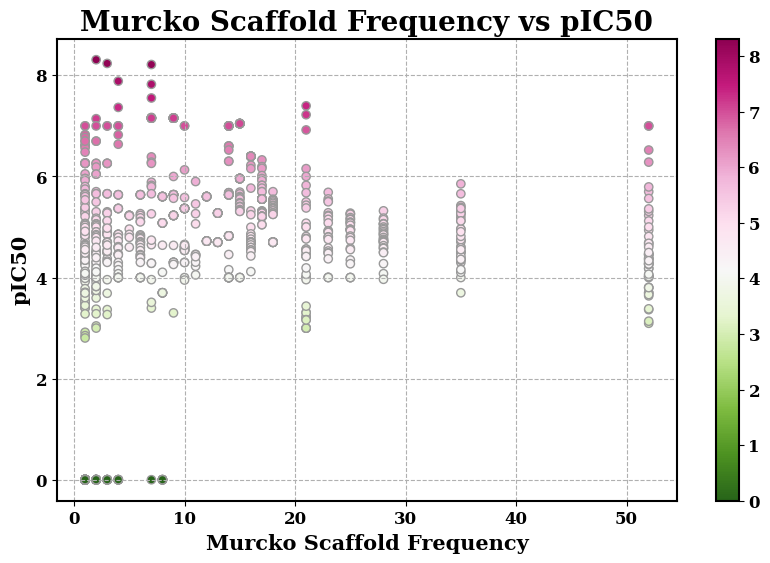

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载合并后的CSV文件
file_path = './Murcko_scaffold/merged_MGAM_pIC50_Scaffolds.csv'
data = pd.read_csv(file_path)

# 绘制散点图，X轴为'Frequency', Y轴为'pIC50'，点的颜色基于'pIC50'的值
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Frequency'], data['pIC50'], c=data['pIC50'], cmap='PiYG_r', 
                      alpha=1, edgecolors='#999999', linewidth=1)  # 添加边框
colorbar = plt.colorbar(scatter)  # 添加显色条

# 设置图表标题和坐标轴标签
plt.title('Murcko Scaffold Frequency vs pIC50', fontsize=20, fontweight='bold')
plt.xlabel('Murcko Scaffold Frequency', fontsize=15, fontweight='bold')
plt.ylabel('pIC50', fontsize=15, fontweight='bold')

# 设置坐标轴数值字体大小为12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 设置图例字体大小为12
colorbar.ax.tick_params(labelsize=12)

# 加粗图框边缘
ax = plt.gca()  # 获取当前轴
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # 设置边框线宽为2
    
# 设置图例边框宽度
colorbar.outline.set_linewidth(1.5)

# 设置网格线为虚线
plt.grid(True, linestyle='--')

# 保存图片为SVG格式
plt.savefig('./Murcko_scaffold/Murcko_pIC50_plot.svg', format='svg')

plt.show()


### 谷本相似性MACCs

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

# 加载数据
file_path = './物理属性/MGAM-dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 计算分子指纹（以MACCs指纹为例）
fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# 计算Tanimoto相似性矩阵
n = len(fps)
similarity_matrix = [[0]*n for _ in range(n)]
for i in range(n):
    for j in range(i, n):
        similarity = TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # 矩阵对称

# 将相似性矩阵转换为数据框
similarity_df = pd.DataFrame(similarity_matrix, index=smiles_list, columns=smiles_list)

# 保存相似性矩阵到CSV文件
similarity_df.to_csv('./物理属性/tanimoto_similarity_matrix.csv')

print("Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix.csv'")


Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix.csv'


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


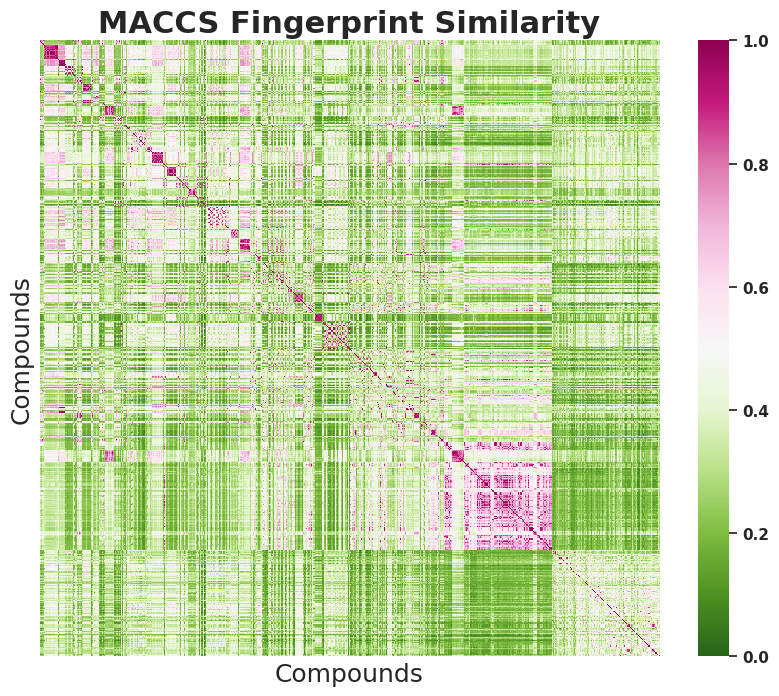

Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix_maccs.csv'
Heatmap has been saved to 'fingerprint_similarity_heatmap.tif'


In [15]:
# 修改图片字体为Times New Roman, 在md05并没有安装成功
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

# 加载数据
file_path = './物理属性/MGAM-dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 计算MACCS分子指纹
fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# 计算Tanimoto相似性矩阵
n = len(fps)
similarity_matrix = [[0]*n for _ in range(n)]
for i in range(n):
    for j in range(i, n):
        similarity = TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # 矩阵对称

# 将相似性矩阵转换为数据框
similarity_df = pd.DataFrame(similarity_matrix, index=smiles_list, columns=smiles_list)

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="PiYG_r", annot=False, cbar=True, xticklabels=False, yticklabels=False)
plt.title('MACCS Fingerprint Similarity', fontsize=22, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Compounds', fontsize=18, fontname='Times New Roman')
plt.ylabel('Compounds', fontsize=18, fontname='Times New Roman')
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')

# 保存图片为TIFF格式，分辨率600 dpi
plt.savefig('./物理属性/fingerprint_similarity_heatmap.tif', format='tiff', dpi=600)

# 显示热图
plt.show()

# 保存相似性矩阵到CSV文件
similarity_df.to_csv('./物理属性/tanimoto_similarity_matrix_maccs.csv')

print("Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix_maccs.csv'")
print("Heatmap has been saved to 'fingerprint_similarity_heatmap.tif'")


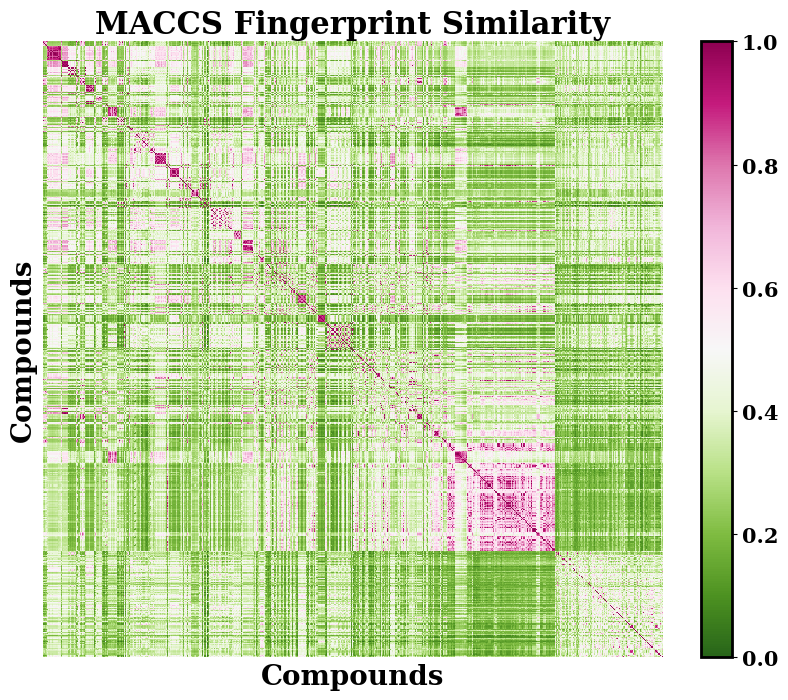

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载Tanimoto相似性矩阵文件
file_path = './物理属性/tanimoto_similarity_matrix_maccs.csv'
similarity_matrix = pd.read_csv(file_path, index_col=0)

# 绘制热图
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(similarity_matrix, cmap='PiYG_r', annot=False, 
                      xticklabels=False, yticklabels=False)
plt.title('MACCS Fingerprint Similarity', fontsize=22, fontweight='bold')
plt.xlabel('Compounds', fontsize=20, fontweight='bold')
plt.ylabel('Compounds', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置图例字体大小
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=15)

# 设置边框宽度
ax = plt.gca()  # 获取当前轴
for spine in ax.spines.values():
    spine.set_linewidth(2)  # 设置边框线宽为2
    
# 设置图例边框宽度
colorbar.outline.set_linewidth(2)

# 保存图片为TIFF格式，分辨率600 dpi
plt.savefig('./物理属性/tanimoto_similarity_heatmap.tif', format='tiff', dpi=600)

plt.show()


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from rdkit import Chem
# from rdkit.Chem import MACCSkeys
# from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

# # 设置全局字体为Times New Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # 加载数据
# file_path = './物理属性/MGAM-dataset02.csv'  # 替换为你的文件路径
# data = pd.read_csv(file_path)

# # 提取SMILES列
# smiles_list = data['canonical_smiles']

# # 计算MACCS分子指纹
# fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# # 计算Tanimoto相似性矩阵
# n = len(fps)
# similarity_matrix = [[0]*n for _ in range(n)]
# for i in range(n):
#     for j in range(i, n):
#         similarity = TanimotoSimilarity(fps[i], fps[j])
#         similarity_matrix[i][j] = similarity
#         similarity_matrix[j][i] = similarity  # 矩阵对称

# # 将相似性矩阵转换为数据框
# similarity_df = pd.DataFrame(similarity_matrix, index=smiles_list, columns=smiles_list)

# # 绘制热图
# plt.figure(figsize=(10, 8))
# sns.heatmap(similarity_df, cmap="PiYG_r", annot=False, cbar=True, xticklabels=False, yticklabels=False)
# plt.title('MACCS Fingerprint Similarity', fontsize=20, fontweight='bold')
# plt.xlabel('Compounds', fontsize=15)
# plt.ylabel('Compounds', fontsize=15)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# # 保存图片为TIFF格式，分辨率600 dpi
# plt.savefig('./物理属性/fingerprint_similarity_heatmap.tif', format='tiff', dpi=600)

# # 显示热图
# plt.show()

# # 保存相似性矩阵到CSV文件
# similarity_df.to_csv('./物理属性/tanimoto_similarity_matrix_maccs.csv')

# print("Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix_maccs.csv'")
# print("Heatmap has been saved to 'fingerprint_similarity_heatmap.tif'")


In [ ]:
# RDKit Fingerprint
from rdkit.Chem import RDKFingerprint
fps = [RDKFingerprint(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# Topological Torsion Fingerprint
from rdkit.Chem import AllChem
fps = [AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# MACCS Keys
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]


### 应用域评估案例1：使用MACCs指纹构建SVM二分类模型

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其MACCs指纹。

In [151]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算MACCS指纹
fingerprints = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smiles)) for smiles in smiles_list]

# 转换为数据框
X = []
for fp in fingerprints:
    arr = []
    for bit in range(1, fp.GetNumBits()):
        arr.append(fp.GetBit(bit))
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建SVM模型
##### 接下来，使用SVM模型进行训练，并进行基本的性能评估。

In [152]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练SVM模型
model = SVC(random_state=0,        # 随机数种子
          class_weight='balanced',  # 类别权重平衡
          gamma='auto',             # 核函数的系数
          C=100,                     # 正则化参数
          kernel='poly',         # 使用sigmoid核
          shrinking=False,           # 是否使用shrinking heuristic方法
          probability=True)         # 是否启用概率估计

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.935064935064935
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       109
           1       0.93      0.94      0.94       122

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.94      0.94       231

[[101   8]
 [  7 115]]


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [153]:
# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [154]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')

可靠预测数目: 224
不可靠预测数目: 7


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

In [142]:
# # 可视化
# plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='blue')
# plt.axvline(x=threshold, color='red', linestyle='--')
# plt.xlabel('Tanimoto Similarity')
# plt.ylabel('Number of Compounds')
# plt.title('Tanimoto Similarity Distribution')
# plt.show()

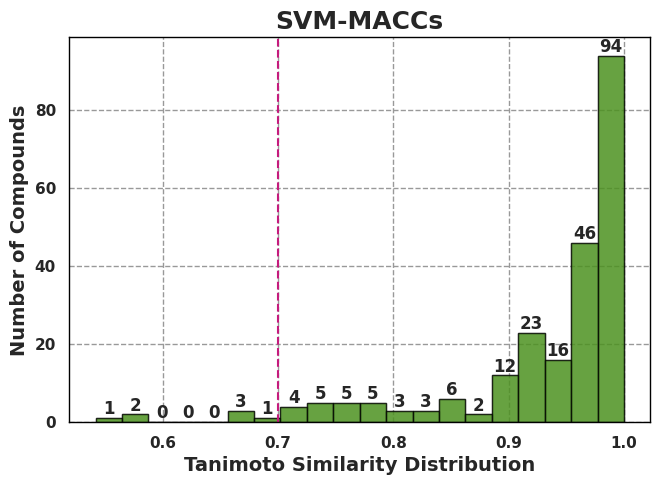

In [155]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('SVM-MACCs', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_SVM_MACCs.svg', format='svg', bbox_inches='tight')

plt.show()

### 应用域评估案例2：使用ECFP4指纹构建RF二分类模型

#### 目的
##### 我们能够使用ECFP4指纹评估随机森林二分类模型的应用域。
##### 相似性高的化合物预测更可靠，而相似性低的化合物则被标记为不可靠。
##### 这种方法可以帮助提高模型预测的可信度，尤其是在化学信息学和药物发现领域。
##### 在实际应用中，可能需要根据具体情况调整阈值和方法。
##### 此外，使用更多的相似性度量和聚类方法也可以进一步提高评估的精度。

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其ECFP4指纹。

In [124]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算ECFP4指纹（位数为2048）
fingerprints = [GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), radius=2, nBits=2048) for smiles in smiles_list]

# 转换为数据框
X = []
for fp in fingerprints:
    arr = [0] * 2048
    for bit in fp.GetOnBits():
        arr[bit] = 1
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建RF模型
##### 接下来，使用随机森林模型进行训练，并进行基本的性能评估。

In [125]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练RF模型

model = RandomForestClassifier(
    random_state=0,  # 设置随机种子，确保结果可重复
    class_weight='balanced',  # 类别权重，处理不平衡数据集
    criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
    max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
    bootstrap=True,  # 是否使用bootstrap样本
    max_depth=25,  # 树的最大深度
    min_samples_leaf=3,  # 叶节点最少样本数
    min_samples_split=9,  # 分裂内部节点所需的最小样本数
    n_estimators=98,  # 构建的树的数量
    oob_score=True  # 是否使用袋外样本来评估精度
)

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9567099567099567
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.97      0.95      0.96       122

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

[[105   4]
 [  6 116]]


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [126]:
# 计算Tanimoto相似性
def tanimoto_similarity(fp1, fp2):
    return TanimotoSimilarity(fp1, fp2)

# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [59]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')


可靠预测数目: 156
不可靠预测数目: 75


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

In [128]:
# # 可视化
# plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='blue')
# plt.axvline(x=threshold, color='red', linestyle='--')
# plt.xlabel('Tanimoto Similarity')
# plt.ylabel('Number of Compounds')
# plt.title('Tanimoto Similarity Distribution')
# plt.show()

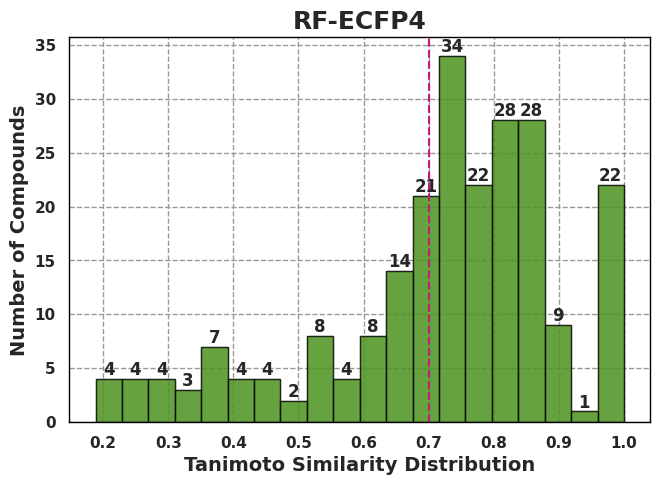

In [127]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('RF-ECFP4', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_RF_ECFP4.svg', format='svg', bbox_inches='tight')

plt.show()

#### 图表解读
* X轴（Tanimoto相似性）：
##### X轴表示每个测试化合物与训练集中最相似化合物之间的Tanimoto相似性系数。
##### 相似性系数从0到1，值越大表示两个化合物之间的结构越相似，1表示完全相同，0表示完全不同。
* Y轴（化合物数量）：
##### Y轴表示具有特定Tanimoto相似性系数的测试化合物数量。
##### 红色虚线：
##### 红色虚线代表设置的Tanimoto相似性阈值（通常为0.7），用于区分预测是否在应用域内。
##### 左侧区域（<0.7）的化合物被认为是在应用域外的预测，其结果可能不可靠。
##### 右侧区域（≥0.7）的化合物被认为是在应用域内的预测，其结果较为可靠。

In [ ]:
# 结果分析
# 相似性分布：

# 从图中可以看到，大部分测试化合物的最大相似性系数集中在0.7以上。这意味着这些化合物与训练集中某些化合物具有较高的结构相似性。
# 在0.7以下的部分仍然存在一定数量的化合物，这些化合物在应用域外，其预测结果可能不可靠。
# 可靠预测和不可靠预测：

# 可靠预测：在阈值0.7右侧的区域，大部分测试化合物与训练集中化合物具有较高的相似性，这部分预测结果更可靠。
# 不可靠预测：在阈值0.7左侧的区域，部分测试化合物与训练集中化合物的相似性较低，这部分预测结果可能不可靠，需要特别注意。
# 应用域评估的重要性
# 提高预测可靠性：通过应用域评估，我们可以识别哪些预测是可靠的，哪些是不可靠的，从而在实际应用中只采用可靠的预测结果，提高模型的整体性能。
# 风险管理：对于应用域外的预测结果，可以采取进一步的实验验证或数据增强等措施，减少因不可靠预测带来的风险。
# 结论
# 通过Tanimoto相似性分布图，我们可以有效评估随机森林模型在测试数据上的应用域，识别可靠和不可靠的预测结果。这有助于在实际应用中提高模型的可信度和预测性能。

### 应用域评估案例3：使用FCFPs指纹构建DNN二分类模型

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其FCFPs指纹。

In [76]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算FCFPs指纹（位数为2048）
fingerprints = [GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smiles), radius=2, nBits=2048, useFeatures=True) for smiles in smiles_list]

# 转换为数据框
X = []
for fp in fingerprints:
    arr = [0] * 2048
    for bit in fp.GetOnBits():
        arr[bit] = 1
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建DNN模型
##### 接下来，使用随机森林模型进行训练，并进行基本的性能评估。

In [77]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练DNN模型
model = MLPClassifier(
    random_state=0,
    activation='identity',
    hidden_layer_sizes = (65, 110, 200),
    learning_rate = 'constant',
    solver = 'sgd')

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.96      0.95      0.95       122

    accuracy                           0.95       231
   macro avg       0.95      0.95      0.95       231
weighted avg       0.95      0.95      0.95       231

[[104   5]
 [  6 116]]


/home/md05/anaconda3/envs/fbw/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [78]:
# 计算Tanimoto相似性
def tanimoto_similarity(fp1, fp2):
    return TanimotoSimilarity(fp1, fp2)

# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [79]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')


可靠预测数目: 185
不可靠预测数目: 46


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

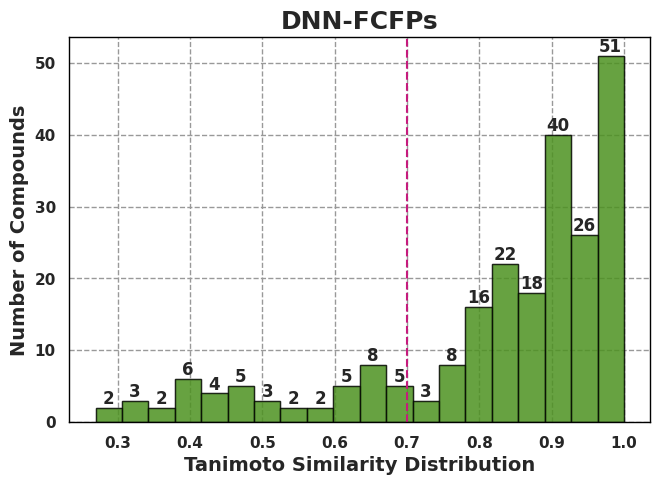

In [123]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('DNN-FCFPs', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_DNN_FCFPs.svg', format='svg', bbox_inches='tight')

plt.show()

### 应用域评估案例4：使用Avalonfps指纹构建DNN二分类模型

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其Avalonfps指纹。

In [131]:
import pandas as pd
from rdkit import Chem
from rdkit.Avalon import pyAvalonTools
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算Avalon指纹（位数为2048）
def get_avalon_fp(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return pyAvalonTools.GetAvalonFP(mol, nBits=2048)
    return None

fingerprints = [get_avalon_fp(smiles) for smiles in smiles_list]

# 清除None值（对于不能转换为mol的smiles）
fingerprints = [fp for fp in fingerprints if fp is not None]
   

# 转换为数据框
X = []
for fp in fingerprints:
    arr = [0] * 2048
    for bit in fp.GetOnBits():
        arr[bit] = 1
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建DNN模型
##### 接下来，使用随机森林模型进行训练，并进行基本的性能评估。

In [132]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练DNN模型
model = MLPClassifier(
    random_state=0,
    activation='relu',
    hidden_layer_sizes = (200, 155, 155),
    learning_rate = 'constant',
    solver = 'sgd')

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.961038961038961
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.96      0.97      0.96       122

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

[[104   5]
 [  4 118]]


/home/md05/anaconda3/envs/fbw/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [133]:
# 计算Tanimoto相似性
def tanimoto_similarity(fp1, fp2):
    return TanimotoSimilarity(fp1, fp2)

# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [134]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')


可靠预测数目: 200
不可靠预测数目: 31


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

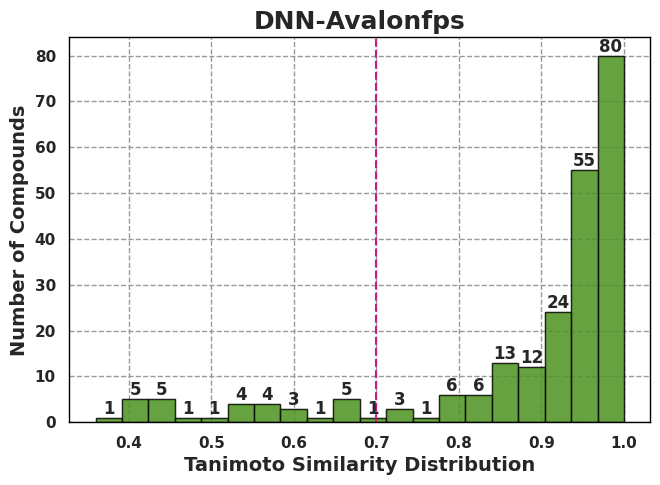

In [136]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('DNN-Avalonfps', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_DNN_Avalonfps.svg', format='svg', bbox_inches='tight')

plt.show()

### 应用域评估案例5：使用Apfps指纹构建SVM二分类模型

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其APfps指纹。

In [145]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetHashedAtomPairFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算APfps指纹
def get_atom_pair_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return GetHashedAtomPairFingerprintAsBitVect(mol, nBits=2048)
    return None

fingerprints = [get_atom_pair_fingerprint(smiles) for smiles in smiles_list]
fingerprints = [fp for fp in fingerprints if fp is not None]  # 移除None值

# 转换为数据框
X = []
for fp in fingerprints:
    arr = []
    for bit in range(fp.GetNumBits()):
        arr.append(fp.GetBit(bit))
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建SVM模型
##### 接下来，使用SVM模型进行训练，并进行基本的性能评估。

In [146]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练SVM模型
model = SVC(random_state=0,        # 随机数种子
          class_weight='balanced',  # 类别权重平衡
          gamma='auto',             # 核函数的系数
          C=10,                     # 正则化参数
          kernel='rbf',         # 使用sigmoid核
          shrinking=False,           # 是否使用shrinking heuristic方法
          probability=True)         # 是否启用概率估计

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9264069264069265
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       109
           1       0.93      0.93      0.93       122

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231

[[101   8]
 [  9 113]]


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [147]:
# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [148]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')

可靠预测数目: 169
不可靠预测数目: 62


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

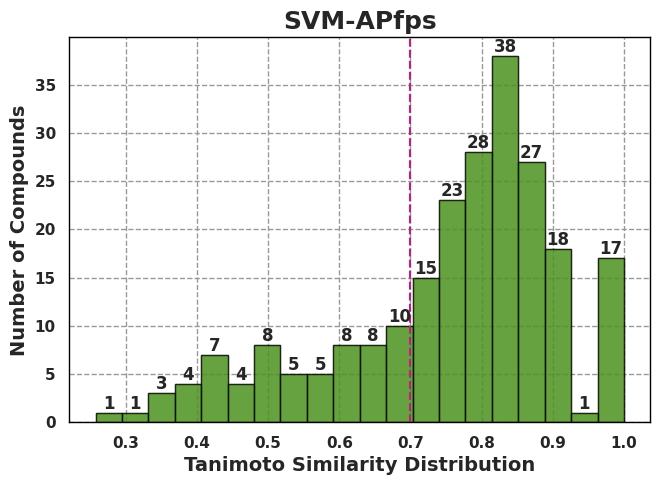

In [150]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('SVM-APfps', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_SVM_APfps.svg', format='svg', bbox_inches='tight')

plt.show()

### 应用域评估案例6：使用Topfps指纹构建GBT二分类模型

#### 1. 数据准备
##### 首先，我们需要准备化合物数据及其对应的SMILES字符串，并计算其Topfps指纹。

In [157]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')
smiles_list = data['canonical_smiles']  # 假设数据中有一列为SMILES字符串
y = data['bioactivity_class']  # 活性数据，二分类标签（如0和1）

# 计算Topfps指纹
def compute_fingerprints(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol)
    return None

fingerprints = [compute_fingerprints(sm) for sm in smiles_list]
fingerprints = [fp for fp in fingerprints if fp is not None]  # 移除None值

# 转换为数据框
X = []
for fp in fingerprints:
    arr = list(fp)  # 直接转换BitVect到列表
    X.append(arr)
X = pd.DataFrame(X)


#### 2. 构建GBT模型
##### 接下来，使用GBT模型进行训练，并进行基本的性能评估。

In [158]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 训练GBT模型
model = GradientBoostingClassifier(random_state=0,
                                 criterion='friedman_mse',
                                 max_depth=12,
                                 max_features='sqrt',
                                 min_samples_leaf=5,
                                 min_samples_split=20,
                                 n_estimators=70)

model.fit(X_train, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.935064935064935
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.93      0.95      0.94       122

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.94      0.94       231

[[100   9]
 [  6 116]]


#### 3. 计算Tanimoto相似性
##### 计算测试集中化合物与训练集中化合物之间的Tanimoto相似性，以评估应用域。

In [159]:
# 计算每个测试化合物与训练集中化合物的最大Tanimoto相似性
similarities = []
for test_idx in X_test.index:
    test_fp = fingerprints[test_idx]
    max_similarity = 0
    for train_idx in X_train.index:
        train_fp = fingerprints[train_idx]
        similarity = tanimoto_similarity(test_fp, train_fp)
        if similarity > max_similarity:
            max_similarity = similarity
    similarities.append(max_similarity)

# 转换为数据框
similarity_df = pd.DataFrame({'test_index': X_test.index, 'max_similarity': similarities})

#### 4. 应用域评估
##### 根据Tanimoto相似性评估模型预测的可靠性。

In [160]:
# 设置相似性阈值
threshold = 0.7

# 评估预测的可靠性
reliable_predictions = similarity_df[similarity_df['max_similarity'] >= threshold]
unreliable_predictions = similarity_df[similarity_df['max_similarity'] < threshold]

print(f'可靠预测数目: {len(reliable_predictions)}')
print(f'不可靠预测数目: {len(unreliable_predictions)}')

可靠预测数目: 179
不可靠预测数目: 52


#### 5. 可视化
##### 绘制可靠和不可靠预测的Tanimoto相似性分布。

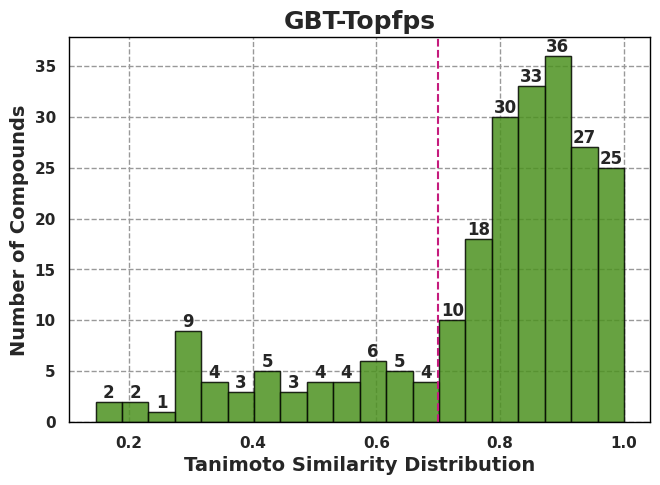

In [161]:
# 设置图形的长宽比为3:2
plt.figure(figsize=(7.5, 5))  # 例如，宽7.5英寸，高5英寸

# 可视化
n, bins, patches = plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.5, color='#4D9221', edgecolor='black')

# 在每个条形上添加数值标签
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

plt.hist(similarity_df['max_similarity'], bins=20, alpha=0.7, color='#4D9221', edgecolor='black')
plt.axvline(x=threshold, color='#C51B7D', linestyle='--')
plt.xlabel('Tanimoto Similarity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Compounds', fontsize=14, fontweight='bold')
plt.title('GBT-Topfps', fontsize=18, fontweight='bold')

# 保存图像为SVG格式
plt.savefig('./应用域/Tanimoto_Similarity_Distribution_Topfps_GBT.svg', format='svg', bbox_inches='tight')

plt.show()

### 侯廷军方法复现-感觉代码不靠谱

In [71]:
# import pandas as pd
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np
# from rdkit.DataStructs.cDataStructs import BulkTanimotoSimilarity

# # 加载数据集
# data_path = './物理属性/MGAM-dataset02.csv'  # 确保数据集包含SMILES列
# df = pd.read_csv(data_path)
# smiles = df['canonical_smiles']
# labels = df['bioactivity_class']  # 你的目标变量列

# # 计算ECFP4指纹
# def calculate_ecfp4(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     return AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# ecfp4_fingerprints = [calculate_ecfp4(smi) for smi in smiles]

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(ecfp4_fingerprints, labels, test_size=0.3, random_state=13)

# # 训练随机森林模型
# rf = RandomForestClassifier(
#     random_state=0,  # 设置随机种子，确保结果可重复
#     class_weight='balanced',  # 类别权重，处理不平衡数据集
#     criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
#     max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
#     bootstrap=True,  # 是否使用bootstrap样本
#     max_depth=25,  # 树的最大深度
#     min_samples_leaf=3,  # 叶节点最少样本数
#     min_samples_split=9,  # 分裂内部节点所需的最小样本数
#     n_estimators=98,  # 构建的树的数量
#     oob_score=True  # 是否使用袋外样本来评估精度
# )

# rf.fit(X_train, y_train)

# # 预测并计算准确率
# y_pred = rf.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # 计算应用域阈值
# def calculate_ad_threshold(X_train):
#     sim_matrix = np.zeros((len(X_train), len(X_train)))
#     for i in range(len(X_train)):
#         sim_matrix[i] = BulkTanimotoSimilarity(X_train[i], X_train)
#     mean_sim = np.mean(sim_matrix)
#     std_sim = np.std(sim_matrix)
#     return mean_sim - 1 * std_sim  # Z可以根据需要调整 z=1

# threshold = calculate_ad_threshold(X_train)

# # 评估测试集是否在应用域内
# def is_within_ad(x, X_train, threshold):
#     max_sim = max(BulkTanimotoSimilarity(x, X_train))
#     return max_sim >= threshold

# in_ad = [is_within_ad(x, X_train, threshold) for x in X_test]
# print(f"Samples within AD: {sum(in_ad)} / {len(in_ad)}")


Accuracy: 0.9423631123919308
Samples within AD: 347 / 347


In [72]:
# import pandas as pd
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np
# from rdkit.DataStructs.cDataStructs import BulkTanimotoSimilarity

# # 加载数据集
# data_path = './物理属性/MGAM-dataset02.csv'  # 确保数据集包含SMILES列
# df = pd.read_csv(data_path)
# smiles = df['canonical_smiles']
# labels = df['bioactivity_class']  # 你的目标变量列

# # 计算ECFP4指纹
# def calculate_ecfp4(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     return AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# ecfp4_fingerprints = [calculate_ecfp4(smi) for smi in smiles]

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(ecfp4_fingerprints, labels, test_size=0.3, random_state=13)

# # 训练随机森林模型
# rf = RandomForestClassifier(
#     random_state=0,  # 设置随机种子，确保结果可重复
#     class_weight='balanced',  # 类别权重，处理不平衡数据集
#     criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
#     max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
#     bootstrap=True,  # 是否使用bootstrap样本
#     max_depth=25,  # 树的最大深度
#     min_samples_leaf=3,  # 叶节点最少样本数
#     min_samples_split=9,  # 分裂内部节点所需的最小样本数
#     n_estimators=98,  # 构建的树的数量
#     oob_score=True  # 是否使用袋外样本来评估精度
# )

# rf.fit(X_train, y_train)

# # 预测并计算准确率
# y_pred = rf.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # 计算应用域阈值
# def calculate_ad_threshold(X_train):
#     sim_matrix = np.zeros((len(X_train), len(X_train)))
#     for i in range(len(X_train)):
#         sim_matrix[i] = BulkTanimotoSimilarity(X_train[i], X_train)
#     mean_sim = np.mean(sim_matrix)
#     std_sim = np.std(sim_matrix)
#     return mean_sim - 0.8 * std_sim  # Z可以根据需要调整 z=0.8

# threshold = calculate_ad_threshold(X_train)

# # 评估测试集是否在应用域内
# def is_within_ad(x, X_train, threshold):
#     max_sim = max(BulkTanimotoSimilarity(x, X_train))
#     return max_sim >= threshold

# in_ad = [is_within_ad(x, X_train, threshold) for x in X_test]
# print(f"Samples within AD: {sum(in_ad)} / {len(in_ad)}")


Accuracy: 0.9423631123919308
Samples within AD: 347 / 347


In [73]:
# import pandas as pd
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np
# from rdkit.DataStructs.cDataStructs import BulkTanimotoSimilarity

# # 加载数据集
# data_path = './物理属性/MGAM-dataset02.csv'  # 确保数据集包含SMILES列
# df = pd.read_csv(data_path)
# smiles = df['canonical_smiles']
# labels = df['bioactivity_class']  # 你的目标变量列

# # 计算ECFP4指纹
# def calculate_ecfp4(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     return AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# ecfp4_fingerprints = [calculate_ecfp4(smi) for smi in smiles]

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(ecfp4_fingerprints, labels, test_size=0.3, random_state=13)

# # 训练随机森林模型
# rf = RandomForestClassifier(
#     random_state=0,  # 设置随机种子，确保结果可重复
#     class_weight='balanced',  # 类别权重，处理不平衡数据集
#     criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
#     max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
#     bootstrap=True,  # 是否使用bootstrap样本
#     max_depth=25,  # 树的最大深度
#     min_samples_leaf=3,  # 叶节点最少样本数
#     min_samples_split=9,  # 分裂内部节点所需的最小样本数
#     n_estimators=98,  # 构建的树的数量
#     oob_score=True  # 是否使用袋外样本来评估精度
# )

# rf.fit(X_train, y_train)

# # 预测并计算准确率
# y_pred = rf.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # 计算应用域阈值
# def calculate_ad_threshold(X_train):
#     sim_matrix = np.zeros((len(X_train), len(X_train)))
#     for i in range(len(X_train)):
#         sim_matrix[i] = BulkTanimotoSimilarity(X_train[i], X_train)
#     mean_sim = np.mean(sim_matrix)
#     std_sim = np.std(sim_matrix)
#     return mean_sim - 0.5 * std_sim  # Z可以根据需要调整 z=0.5

# threshold = calculate_ad_threshold(X_train)

# # 评估测试集是否在应用域内
# def is_within_ad(x, X_train, threshold):
#     max_sim = max(BulkTanimotoSimilarity(x, X_train))
#     return max_sim >= threshold

# in_ad = [is_within_ad(x, X_train, threshold) for x in X_test]
# print(f"Samples within AD: {sum(in_ad)} / {len(in_ad)}")


Accuracy: 0.9423631123919308
Samples within AD: 347 / 347


In [74]:
# import pandas as pd
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np
# from rdkit.DataStructs.cDataStructs import BulkTanimotoSimilarity

# # 加载数据集
# data_path = './物理属性/MGAM-dataset02.csv'  # 确保数据集包含SMILES列
# df = pd.read_csv(data_path)
# smiles = df['canonical_smiles']
# labels = df['bioactivity_class']  # 你的目标变量列

# # 计算ECFP4指纹
# def calculate_ecfp4(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     return AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)

# ecfp4_fingerprints = [calculate_ecfp4(smi) for smi in smiles]

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(ecfp4_fingerprints, labels, test_size=0.3, random_state=13)

# # 训练随机森林模型
# rf = RandomForestClassifier(
#     random_state=0,  # 设置随机种子，确保结果可重复
#     class_weight='balanced',  # 类别权重，处理不平衡数据集
#     criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
#     max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
#     bootstrap=True,  # 是否使用bootstrap样本
#     max_depth=25,  # 树的最大深度
#     min_samples_leaf=3,  # 叶节点最少样本数
#     min_samples_split=9,  # 分裂内部节点所需的最小样本数
#     n_estimators=98,  # 构建的树的数量
#     oob_score=True  # 是否使用袋外样本来评估精度
# )

# rf.fit(X_train, y_train)

# # 预测并计算准确率
# y_pred = rf.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# # 计算应用域阈值
# def calculate_ad_threshold(X_train):
#     sim_matrix = np.zeros((len(X_train), len(X_train)))
#     for i in range(len(X_train)):
#         sim_matrix[i] = BulkTanimotoSimilarity(X_train[i], X_train)
#     mean_sim = np.mean(sim_matrix)
#     std_sim = np.std(sim_matrix)
#     return mean_sim - 0.05 * std_sim  # Z可以根据需要调整 z=0.05

# threshold = calculate_ad_threshold(X_train)

# # 评估测试集是否在应用域内
# def is_within_ad(x, X_train, threshold):
#     max_sim = max(BulkTanimotoSimilarity(x, X_train))
#     return max_sim >= threshold

# in_ad = [is_within_ad(x, X_train, threshold) for x in X_test]
# print(f"Samples within AD: {sum(in_ad)} / {len(in_ad)}")


Accuracy: 0.9423631123919308
Samples within AD: 347 / 347


### 分子图片识别

In [17]:
# pip install dgl rdkit pillow matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.9 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 3.3 MB/s eta 0:00:0000:0100:02
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/41/24/0b023b6537dfc9bae2c779353998e3e99ac7dfff4222fc6126650e93c3f3/filelock-3.14.0-py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.9

In [46]:
# import dgl
# import torch
# from rdkit import Chem
# from rdkit.Chem import Draw
# from PIL import Image
# import matplotlib.pyplot as plt
# from io import BytesIO

# # 定义一个函数将SMILES转换为分子图
# def smiles_to_mol(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     return mol

# # 定义一个函数将分子图保存为图片
# def mol_to_image(mol, img_path):
#     img = Draw.MolToImage(mol)
#     img.save(img_path)

# # 定义一个函数从图片读取原子和键信息
# def image_to_atoms_and_bonds(img_path):
#     img = Image.open(img_path)
#     img = img.convert("RGB")
#     mol = Chem.MolFromImage(img)
#     if mol is None:
#         raise ValueError("Could not convert image to molecule.")
#     atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
#     bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()]
#     return atoms, bonds

# # 示例SMILES字符串
# smiles = 'CCO'  # 乙醇

# # 将SMILES转换为分子图
# mol = smiles_to_mol(smiles)

# # 保存分子图为图片
# img_path = 'molecule.png'
# mol_to_image(mol, img_path)

# # 从图片读取原子和键信息
# atoms, bonds = image_to_atoms_and_bonds(img_path)

# print("Atoms:", atoms)
# print("Bonds:", bonds)

# # 显示图片
# img = Image.open(img_path)
# plt.imshow(img)
# plt.axis('off')
# plt.show()


In [ ]:
# # 创建虚拟环境
# conda create -n dgl-env python=3.8
# conda activate dgl-env
# pip install dgl==0.9.1  # 或者其他版本
# pip install torch==1.10.1 torchdata==0.4.0
# pip install rdkit pillow matplotlib pandas seaborn
